960 trials, 8 subjects, 8 conditions (4 fixation, 4 free viewing)

480 fixations
480 free viewing experiments

6 lidí pro trénink, 2 pro test

Cílem je určit jaký task vykonávají. 8 kategorií

Jen pro free view


sktime library

features -> classifier

pupil size -> univariate

position -> MrSEQL

Dataset builder choose subjects

- choose 2 from 8, build train_X, test_X, train_Y, test_Y


In [10]:
import pandas as pd
import re

df = pd.read_csv("DataSummary.csv")


file_reg = re.compile("([^_]+)_([^_]+)_([^_]+)_([^_]+)_([^_.]+)")
def match_trialfile_name(file_name):
  
    match_res = file_reg.search(file_name)

def generate_dataset(dataset_path, subjects, stimuli):
    for subject_dir in os.listdir(dataset_path):
        if subject_dir in subjects:
            for trial_file in os.listdir(f"{dataset_path}/{subject_dir}"):
                print(trial_file)

generate_dataset("data", ["019", ["009"]], [])

019_001_Fixation_Natural_nat001.csv
019_002_Fixation_Puzzle_puz002.csv
019_003_Fixation_Waldo_wal003.csv
019_004_Fixation_Waldo_wal005.csv
019_005_FreeViewing_Blank_grey.csv
019_006_FreeViewing_Natural_nat003.csv
019_007_FreeViewing_Waldo_wal004.csv
019_008_Fixation_Natural_nat005.csv
019_009_FreeViewing_Blank_grey.csv
019_010_Fixation_Puzzle_puz001.csv
019_011_Fixation_Waldo_wal002.csv
019_012_FreeViewing_Blank_grey.csv
019_013_FreeViewing_Waldo_wal001.csv
019_014_Fixation_Blank_grey.csv
019_015_Fixation_Blank_grey.csv
019_016_FreeViewing_Natural_nat002.csv
019_017_FreeViewing_Natural_nat001.csv
019_018_FreeViewing_Puzzle_puz003.csv
019_019_Fixation_Blank_grey.csv
019_020_FreeViewing_Waldo_wal002.csv
019_021_Fixation_Puzzle_puz003.csv
019_022_Fixation_Waldo_wal004.csv
019_023_FreeViewing_Natural_nat004.csv
019_024_FreeViewing_Waldo_wal003.csv
019_025_FreeViewing_Puzzle_puz002.csv
019_026_Fixation_Puzzle_puz004.csv
019_027_FreeViewing_Blank_grey.csv
019_028_Fixation_Blank_grey.csv
019_

In [3]:
df["Stimulus"]

0      FreeViewing
1         Fixation
2         Fixation
3      FreeViewing
4      FreeViewing
          ...     
955       Fixation
956       Fixation
957    FreeViewing
958    FreeViewing
959       Fixation
Name: Task, Length: 960, dtype: object

In [12]:
exp = pd.read_csv("data/019/019_024_FreeViewing_Waldo_wal003.csv")

exp.head()

,Time,LXpix,LYpix,RXpix,RYpix,LXhref,LYhref,RXhref,RYhref,LP,RP
0,1949718,379.86,309.225,374.50,308.475,-6.0,1183.0,-63.0,1173.0,875,907
1,1949720,379.46,308.325,374.58,308.100,-10.0,1173.0,-61.0,1170.0,874,906
2,1949722,379.06,307.425,374.74,307.725,-14.0,1163.0,-60.0,1166.0,873,905
3,1949724,379.14,307.275,373.94,306.525,-13.0,1161.0,-68.0,1153.0,874,909
4,1949726,379.22,304.800,374.34,305.850,-12.0,1135.0,-64.0,1145.0,878,911


In [21]:
exp.loc[:,["Time", "LXpix", "LYpix", "LP"]]


,Time,LXpix,LYpix,LP
0,1949718,379.86,309.225,875
1,1949720,379.46,308.325,874
2,1949722,379.06,307.425,873
3,1949724,379.14,307.275,874
4,1949726,379.22,304.800,878
...,...,...,...,...
22494,1994706,103.14,554.250,1093
22495,1994708,103.14,555.225,1090
22496,1994710,103.14,554.325,1096
22497,1994712,103.46,554.100,1095


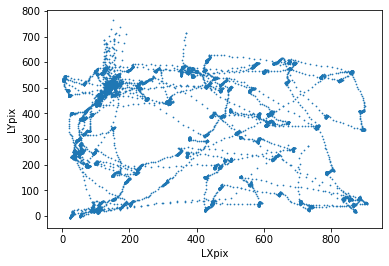

In [23]:
exp.plot.scatter("LXpix", "LYpix", s=0.5)

In [3]:
import pandas as pd
import re
import os

FILE_REG = re.compile("([^_]+)_([^_]+)_([^_]+)_([^_]+).*")

STIMULI_ENCODING = {
    "Blank": 0,
    "Natural": 1,
    "Puzzle": 3,
    "Waldo": 4,
}

ALL_SUBJECTS = ["019", "009", "022", "058", "059", "060", "062", "SMC"]
ALL_STIMULI =  ["Waldo", "Blank", "Natural", "Puzzle"]

def match_trialfile_name(file_name):
    """Gets trial information from filename

    Args:
        filename (string): filename of the trial

    Returns:
        Tuple: 
            Item 0 - Subject id
            Item 2 - Task (Fixation|FreeViewing)
            Item 3 - Stimulus
    """
    match_res = FILE_REG.search(file_name)
    if match_res is None:
        print(file_name)
    return match_res.group(1), match_res.group(3), match_res.group(4)

def generate_dataset(dataset_path, subjects, stimuli):
    count = 0
    dataset_dict = {
        "Time": [],
        "LX": [],
        "LY": [],
        "LP": []
    }
    trial_stimuli = []
    trial_subjects = []
    for subject_dir in os.listdir(dataset_path):
        if subject_dir in subjects:
            for trial_filename in os.listdir(f"{dataset_path}/{subject_dir}"):
                subj, task, stimulus = match_trialfile_name(trial_filename)

                if task != "FreeViewing" or stimulus not in stimuli:
                    continue

                print(f"Processing Trial {count}: Subject: {subj}, Task: {task}, Stimulus: {stimulus} ({STIMULI_ENCODING[stimulus]})")
                
                trial_df = pd.read_csv(f"{dataset_path}/{subject_dir}/{trial_filename}")
                dataset_dict["Time"].append(trial_df["Time"].dropna().size)
                dataset_dict["LX"].append(trial_df["LXpix"].dropna().size)
                dataset_dict["LY"].append(trial_df["LYpix"].dropna().size)
                dataset_dict["LP"].append(trial_df["LP"].dropna().size)
                trial_stimuli.append(STIMULI_ENCODING[stimulus])
                trial_subjects.append(subj)
                count += 1


    print(f"Processed {count} trials")
    return pd.DataFrame(dataset_dict), pd.Series(trial_stimuli), pd.Series(trial_subjects)

dataset = generate_dataset("../data", ALL_SUBJECTS, ALL_STIMULI)

print(dataset.describe())

215: Subject: 058, Task: FreeViewing, Stimulus: Blank (0)
Processing Trial 216: Subject: 058, Task: FreeViewing, Stimulus: Waldo (4)
Processing Trial 217: Subject: 058, Task: FreeViewing, Stimulus: Blank (0)
Processing Trial 218: Subject: 058, Task: FreeViewing, Stimulus: Puzzle (3)
Processing Trial 219: Subject: 058, Task: FreeViewing, Stimulus: Blank (0)
Processing Trial 220: Subject: 058, Task: FreeViewing, Stimulus: Natural (1)
Processing Trial 221: Subject: 058, Task: FreeViewing, Stimulus: Blank (0)
Processing Trial 222: Subject: 058, Task: FreeViewing, Stimulus: Waldo (4)
Processing Trial 223: Subject: 058, Task: FreeViewing, Stimulus: Blank (0)
Processing Trial 224: Subject: 058, Task: FreeViewing, Stimulus: Puzzle (3)
Processing Trial 225: Subject: 058, Task: FreeViewing, Stimulus: Waldo (4)
Processing Trial 226: Subject: 058, Task: FreeViewing, Stimulus: Puzzle (3)
Processing Trial 227: Subject: 058, Task: FreeViewing, Stimulus: Waldo (4)
Processing Trial 228: Subject: 058, T

AttributeError: 'tuple' object has no attribute 'describe'

In [19]:
print(dataset[0].cummin(axis="Time"))

ValueError: No axis named Time for object type DataFrame

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


from sktime.datasets import load_basic_motions

X, y = load_basic_motions(return_X_y=True)
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# X_train.head()

                                               dim_0  \
0  0     0.079106
1     0.079106
2    -0.903497
3...   
1  0     0.377751
1     0.377751
2     2.952965
3...   
2  0    -0.813905
1    -0.813905
2    -0.424628
3...   
3  0     0.289855
1     0.289855
2    -0.669185
3...   
4  0    -0.123238
1    -0.123238
2    -0.249547
3...   

                                               dim_1  \
0  0     0.394032
1     0.394032
2    -3.666397
3...   
1  0    -0.610850
1    -0.610850
2     0.970717
3...   
2  0     0.825666
1     0.825666
2    -1.305033
3...   
3  0     0.284130
1     0.284130
2    -0.210466
3...   
4  0     0.379341
1     0.379341
2     0.541501
3...   

                                               dim_2  \
0  0     0.551444
1     0.551444
2    -0.282844
3...   
1  0    -0.147376
1    -0.147376
2    -5.962515
3...   
2  0     0.032712
1     0.032712
2     0.826170
3...   
3  0     0.213680
1     0.213680
2     0.252267
3...   
4  0    -0.286006
1    -0.286006
2     0.20842